This is a notebook to make some charts showing the bias-variance tradeoff in a multi-variable model.  First step is to make up some data.  For the high bias data we will include independent variables but ommit a higher order term.  For the high variance data we will include many more terms, some of which strongly correlate with each other.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

colors = ['orange', 'blue','green','red','purple']
cols = ['intercept','i','a','s','r','a2','n','c','e','noise']

In [3]:
def create_data_frame():
    i = np.random.rand(40,1)
    a = np.random.rand(40,1) + 0.02*i
    a2 = a**2
    s = np.random.rand(40,1) + 0.10*a
    r = 0.50*np.random.rand(40,1) + 0.50*a
    n = 0.50*np.random.rand(40,1) + 0.50*a
    c = 0.50*np.random.rand(40,1) + 0.50*a
    e = 0.50*np.random.rand(40,1) + 0.50*a
    df = pd.DataFrame(np.column_stack([a,r,i,a2,n,c,e,s]), columns=['a','r','i','a2','n','c','e','s'])
    df['y'] = 1*df.i + 2*df.a + 5*df.a2 + 5*df.s + 0.1*df.r + 0.1*df.n + 0.1*df.c + 0.1*df.e + 6 * np.random.rand()
    biased_ols = smf.ols('y ~ i + a + s', df).fit()
    high_var_ols = smf.ols('y ~ a + r + i + a2 + n + c + e', df).fit()
    return biased_ols, high_var_ols, df

The high bias model doesn't have the $a^2$ term but doesn't have the terms r, n, c, e, all of which correlate with a but have little predictive ability themselves.

One of the clearest places we can see the difference between high bias and high variance is by looking at graphs of their residuals (i.e. the difference between the predictions and the actual values).

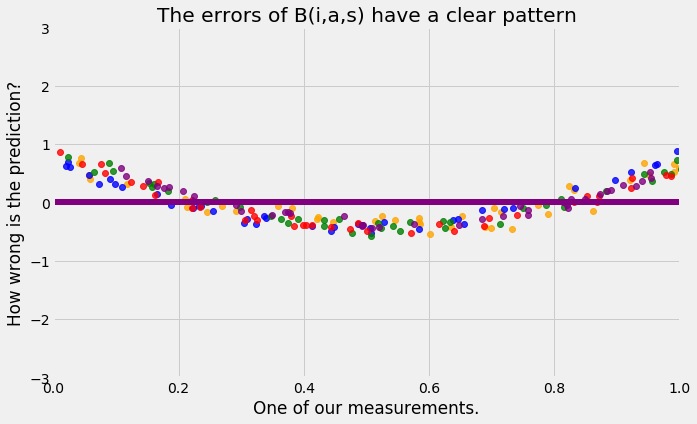

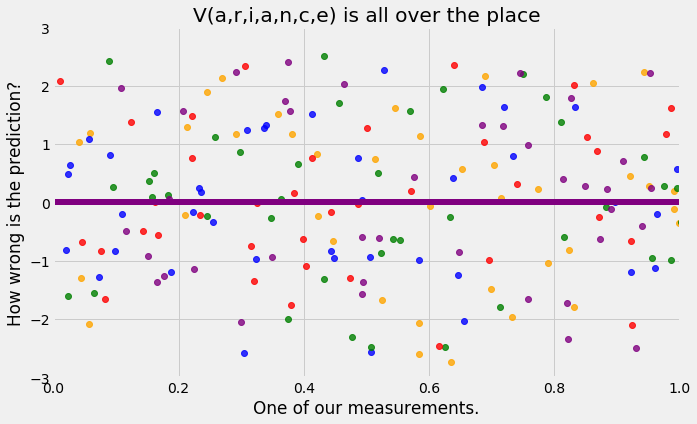

In [4]:
fig3, axes3 = plt.subplots(1,1, figsize=(10,6), sharex=True,sharey=True)
fig4, axes4 = plt.subplots(1,1, figsize=(10,6), sharex=True,sharey=True)
axes3.set_xlim(0,1)
axes3.set_ylim(-3,3)
axes4.set_xlim(0,1)
axes4.set_ylim(-3,3)


bias = pd.DataFrame(columns=cols)
variance = pd.DataFrame(columns=cols)

for x in range(50):    
    biased_ols, high_var_ols, df = create_data_frame()
    df['yhat_biased'] = biased_ols.fittedvalues
    df['resid_biased'] = biased_ols.resid
    df['yhat_high_var'] = high_var_ols.fittedvalues
    df['resid_high_var'] = high_var_ols.resid
    bias = pd.concat([bias, pd.DataFrame(biased_ols.params).transpose()], ignore_index=True)
    variance = pd.concat([variance, pd.DataFrame(high_var_ols.params).transpose()], ignore_index=True)
    if x<5:
        sns.regplot(x="a", y="resid_biased", data=df,ci=None, ax=axes3,color=colors[x], fit_reg=True);
        sns.regplot(x="a", y="resid_high_var", data=df,ci=None, ax=axes4,color=colors[x], fit_reg=True);


axes3.set(ylabel='How wrong is the prediction?',xlabel='One of our measurements.',
          title="The errors of B(i,a,s) have a clear pattern");
axes4.set(ylabel='How wrong is the prediction?',xlabel='One of our measurements.', 
          title="V(a,r,i,a,n,c,e) is all over the place");


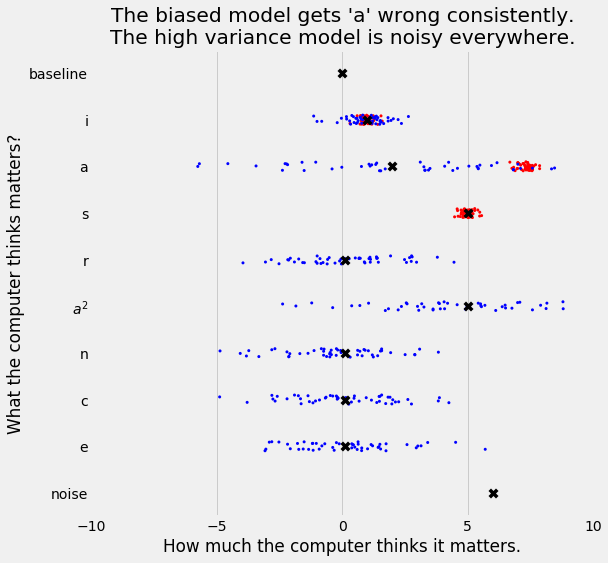

In [6]:
actual = pd.DataFrame([[0, 1, 2, 5, 0.1, 5, 0.1, 0.1, 0.1, 6]], columns=cols);

fig5, axes5 = plt.subplots(1,1, figsize=(8,8), sharex=True,sharey=True);

bias = bias[['intercept','i','a','s','r','a2','n','c','e','noise']];
variance = variance[['intercept','i','a','s','r','a2','n','c','e','noise']];

sns.stripplot(data=bias, orient="h", color='red', jitter=True, ax=axes5, size=3);
sns.stripplot(data=variance, orient="h", color='blue', jitter=True, ax=axes5, size=3);
sns.stripplot(data=actual, orient='h', color='black', marker="X", ax=axes5, size=10);


axes5.set(ylabel='What the computer thinks matters?',xlabel='How much the computer thinks it matters.', 
          title="The biased model gets 'a' wrong consistently.\nThe high variance model is noisy everywhere.", xlim=(-10,10),
         xticks=[-10,-5,0,5,10],
         yticklabels=['baseline','i','a','s','r', '$a^{2}$','n','c','e','noise']);
